<a href="https://colab.research.google.com/github/HelloWorld33333/Pork/blob/main/n212a_multiple_regression_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

In [ ]:
df.columns

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요
- **훈련데이터 샘플의 갯수를 제출하세요.**

In [3]:
### 이곳에서 과제를 진행해 주세요 ###
import datetime

df['date'] = pd.to_datetime(df['date']).dt.date

test = df.loc[df['date'] > datetime.date(2015, 1, 1)]
train = df.drop(test.index)
print(test.shape, train.shape)

(6980, 21) (14633, 21)


### 2) 두 특성(bathrooms, sqft_living)을 사용해서 다중선형회귀 모델을 만들어 보세요
- 학습시 Parameters는 모두 기본값으로 합니다.
- 정규화(normalize) 등 추가적인 데이터처리 없이 진행합니다.
- **테스트세트의 MAE 값을 제출하세요.(소수점 이하 반올림)**

In [4]:
### 이곳에서 과제를 진행해 주세요 ###

features = ['bathrooms', 'sqft_living']

X_train = train[features]
X_test = test[features]

target = 'price'
y_train = train[target]
y_test = test[target]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

li_r = LinearRegression()

li_r.fit(X_train, y_train)
y_pred = li_r.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

round(mae)

179253

### 3) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.
- **sqft_living의 회귀계수를 제출하세요.(소수점 이하 반올림)**

In [5]:
### 이곳에서 과제를 진행해 주세요 
li_r.intercept_, li_r.coef_

(-50243.56279640319, array([-5158.92591411,   286.13753555]))

### 4) MSE, RMSE, MAE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요
- **테스트 데이터에 대한 MSE, RMSE, MAE, $R^2$ 값을 올바르게 적은 보기를 고르세요.(소수점 두자리수 이하 반올림)**

In [6]:
### 이곳에서 과제를 진행해 주세요 ###
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

y_pred = li_r.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(round(mse, 1), round(mae, 1), round(rmse, 1), round(r2, 1))

71083994178.8 179252.5 266615.8 0.5


## 🔥도전과제

### 공지로 안내드리는 Github - Discussion 페이지에 올려 보세요:)

### 5)  EDA를 진행하시고, 두개 이상의 특성을 선택하여 특성공학(feature engineering)을 진행한 후 아래의 질문들에 대한 본인만의 리포트를 작성해보시고 서로 논해 보세요. 
- 어떤 이유에서 해당 특성공학을 진행하셨나요? 특성공학을 통해 기대하는 효과는 무엇이었나요? 만약 얻고자 하는 효과를 얻지 못했다면 이유는 무엇이며 어떤 액션을 추가할 수 있을까요? 
- 특성공학을 거친 특성을 포함해 다수의 특성을 사용한 모델을 학습하고 테스트 데이터에 대해 MSE, RMSE, MAE, R2 스코어는 어떠한가요? 해당 결과를 통해 얻을 수 있는 인사이트는 어떤 것이 있었나요? 
- 만들어진 회귀계수를 사용해 모델을 설명해 본다면? 
- 만들어진 모델은 과소적합인가요? 과대적합인가요? 일반화가 잘 된 모델을 만들기 위해 추가로 할 수 있는 액션은 어떤 것이 있을까요? 

※kaggle notebook에서도 힌트를 얻어 보세요. 

In [46]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

0    21450
1      163
Name: waterfront, dtype: int64

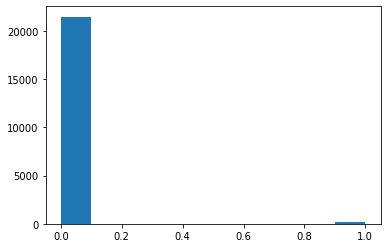

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['waterfront'])

df['waterfront'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

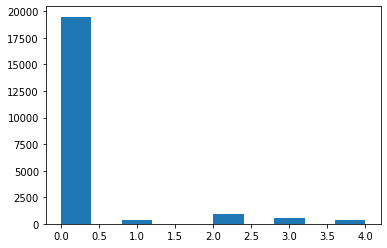

In [9]:
plt.hist(df['view'])

df['view'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

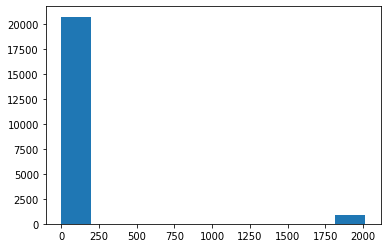

In [10]:
plt.hist(df['yr_renovated'])

df['yr_renovated'].value_counts()

In [42]:
# id : 주택의 고유 id, 	date : 집이 판매된 날짜,  zipcode : 우편번호, lat : 위도
# 해당 데이터는 집값을 예측하는데에 필요 없는 데이터

# waterfront : 아파트가 해안가를 내려다 보고 있는지에 대한 여부,	view : 전망이 얼마나 좋은지를 나타내는 변수
# 해당 데이터들은 데이터의 역할을 수행하지 못할 정도로 어느 한 값에 치우쳐져 있어서 삭제

# sqft_above : 지면보다 높은 내부 주택의 공간의 평당 피트 수
# 해당 데이터는 sqft_living 데이터와 너무 유사하기 때문에 삭제

# yr_renovated : 리모델링 년도를 나타냄, 리모델링 하지 않았으면 0으로 채움
# 해당 데이터는 리모델링 여부로 리모델링 하지 않았으면 0, 1980년대 이전에 했으면 2, 그 이후에는 3으로 변경

#df['yr_renovated'] = pd.to_numeric(df['yr_renovated'])

def category(x) : 
  if x == 0 : return 0
  elif (x > 1) & (x < 1980) : return 1
  else : return 2

df['yr_renovated'] = df['yr_renovated'].apply(category)

df['yr_renovated'].value_counts()

0    20699
1      792
2      122
Name: yr_renovated, dtype: int64

In [50]:
df_EDA = pd.concat([df.loc[:, 'price':'floors'], df.loc[:, 'condition':'grade'], df.loc[:, 'sqft_basement':'yr_renovated'], df.loc[:, 'sqft_living15':'sqft_lot15']], axis=1)

df_EDA['bathrooms'] = df['bathrooms'].astype(int)
df_EDA['floors'] = df['floors'].astype(int)

df_EDA
# 전처리 완료

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,3,7,0,1955,0,1340,5650
1,538000.0,3,2,2570,7242,2,3,7,400,1951,1,1690,7639
2,180000.0,2,1,770,10000,1,3,6,0,1933,0,2720,8062
3,604000.0,4,3,1960,5000,1,5,7,910,1965,0,1360,5000
4,510000.0,3,2,1680,8080,1,3,8,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,1131,3,3,8,0,2009,0,1530,1509
21609,400000.0,4,2,2310,5813,2,3,8,0,2014,0,1830,7200
21610,402101.0,2,0,1020,1350,2,3,7,0,2009,0,1020,2007
21611,400000.0,3,2,1600,2388,2,3,8,0,2004,0,1410,1287


In [65]:
from sklearn.preprocessing import StandardScaler

train = df.sample(frac=0.75,random_state=1)
test = df.drop(train.index)

scaler = StandardScaler()

features = ['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'condition',	'grade',	'sqft_basement',	'yr_built',	'yr_renovated',	'sqft_living15', 'sqft_lot15']

X_train = train[features]
X_test = test[features]

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

target = 'price'
y_train = train[target]
y_test = test[target]

li_r.fit(X_train_scaled, y_train)
y_pred = li_r.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(round(mse, 1), round(mae, 1), round(rmse, 1), round(r2, 1))

52090802587.0 143851.9 228234.1 0.6


## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)